In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [106]:
df = pd.read_csv('/content/CW2_Facebook_metrics.csv')
print("df =",df.shape)
df.head(500)

df = (500, 19)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Comments,Likes,Shares,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [107]:
#finding out NANs in the table in order to treat them for better results
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [108]:
#Alternate to droping row/coloumn. We deleted specific cells with NANs. Names identifies using step 4
df.dropna(subset=['Paid', 'Likes', 'Shares'],axis=0,inplace=True)

In [109]:
#Verifying the status after deleting NANs
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [110]:
df['Paid'] = df['Paid'].astype('int64')
df['Likes'] = df['Likes'].astype('int64')
df['Shares'] = df['Shares'].astype('int64')

In [111]:
df.dtypes

Page total likes                                                        int64
Type                                                                   object
Category                                                                int64
Post Month                                                              int64
Post Weekday                                                            int64
Post Hour                                                               int64
Paid                                                                    int64
Lifetime Post Total Reach                                               int64
Lifetime Post Total Impressions                                         int64
Lifetime Engaged Users                                                  int64
Lifetime Post Consumers                                                 int64
Lifetime Post Consumptions                                              int64
Lifetime Post Impressions by people who have liked your Page    

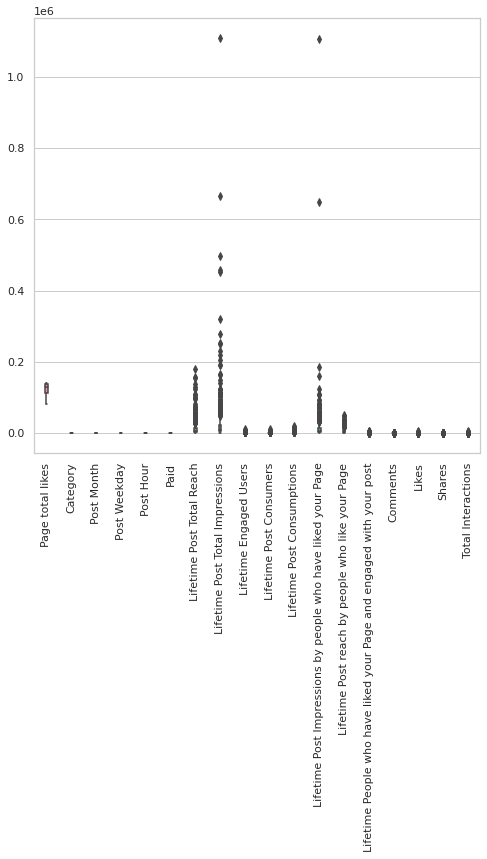

In [112]:
#Multiple Boxplot on one figure
#set Style

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,8))

g = sns.boxplot(data=df, width=0.1)
plt.xticks(rotation='vertical')


plt.show()

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Here we will get IQR for each column.

Page total likes                                                       24069.0
Category                                                                   2.0
Post Month                                                                 6.0
Post Weekday                                                               4.0
Post Hour                                                                  8.0
Paid                                                                       1.0
Lifetime Post Total Reach                                               9917.0
Lifetime Post Total Impressions                                        16705.0
Lifetime Engaged Users                                                   663.0
Lifetime Post Consumers                                                  634.0
Lifetime Post Consumptions                                               966.5
Lifetime Post Impressions by people who have liked your Page           11069.5
Lifetime Post reach by people who like your Page    

In [114]:
#The below code will remove the outliers from the dataset.

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(344, 19)

In [115]:
#Sum of count of NULL values/outliers in each column of the dataset:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [116]:
#Normalization

cols_to_norm = ['Page total likes', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'Comments', 'Likes', 'Shares', 'Total Interactions']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(df[cols_to_norm])

     Page total likes  Category  Post Month  Post Weekday  Post Hour  Paid  \
0            1.000000       0.5         1.0      0.500000   0.090909   0.0   
1            1.000000       0.5         1.0      0.333333   0.409091   0.0   
2            1.000000       1.0         1.0      0.333333   0.090909   0.0   
3            1.000000       0.5         1.0      0.166667   0.409091   1.0   
4            1.000000       0.5         1.0      0.166667   0.090909   0.0   
..                ...       ...         ...           ...        ...   ...   
494          0.064111       1.0         0.0      1.000000   0.409091   0.0   
495          0.064111       1.0         0.0      1.000000   0.045455   0.0   
496          0.000000       0.5         0.0      0.666667   0.318182   0.0   
497          0.000000       0.0         0.0      0.666667   0.045455   0.0   
498          0.000000       1.0         0.0      0.500000   0.454545   0.0   

     Lifetime Post Total Reach  Lifetime Post Total Impressions

In [117]:
df['Page total likes'] = df['Page total likes'].astype('int64')
df['Category'] = df['Category'].astype('int64')
df['Post Month'] = df['Post Month'].astype('int64')
df['Post Weekday'] = df['Post Weekday'].astype('int64')
df['Post Hour'] = df['Post Hour'].astype('int64')
df['Paid'] = df['Paid'].astype('int64')
df['Lifetime Post Total Reach'] = df['Lifetime Post Total Reach'].astype('int64')
df['Lifetime Post Total Impressions'] = df['Lifetime Post Total Impressions'].astype('int64')
df['Lifetime Engaged Users'] = df['Lifetime Engaged Users'].astype('int64')
df['Lifetime Post Consumers'] = df['Lifetime Post Consumers'].astype('int64')
df['Lifetime Post Consumptions'] = df['Lifetime Post Consumptions'].astype('int64')
df['Lifetime Post Impressions by people who have liked your Page'] = df['Lifetime Post Impressions by people who have liked your Page'].astype('int64')
df['Lifetime Post reach by people who like your Page'] = df['Lifetime Post reach by people who like your Page'].astype('int64')
df['Lifetime People who have liked your Page and engaged with your post'] = df['Lifetime People who have liked your Page and engaged with your post'].astype('int64')
df['Comments'] = df['Comments'].astype('int64')
df['Likes'] = df['Likes'].astype('int64')
df['Shares'] = df['Shares'].astype('int64')
df['Total Interactions'] = df['Total Interactions'].astype('int64')

METHOD 1: Logistic Regression with scikit-learn


In [118]:
#Dataset splited into features and target variable
feature_cols = ['Category', 'Post Month', 'Post Weekday', 
'Post Hour','Comments', 'Likes', 'Shares']
# Features
X = df[feature_cols]
# Target variable
y = df.Paid

Splitting Data - 
To understand model performance, dividing the dataset into a training set and a test set.

In [119]:
#split the data qet into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#scale the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Using Logistic Regression Algorithm to the Training Set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

METHOD 2 - Decision Tree Classifier

In [120]:
#Dataset splited into features and target variable
feature_cols = ['Category', 'Post Month', 'Post Weekday', 
'Post Hour','Comments', 'Likes', 'Shares']
# Features
X = df[feature_cols]
# Target variable
y = df.Paid

Splitting The Data

In [121]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3, random_state=1)
# 70% training and 30% test


 Building Decision Tree Model

In [122]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0]


In [124]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6912751677852349


# Build the kNN classifier 

In [125]:
knn = KNeighborsClassifier() #create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 100)} #use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=10) #fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [126]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 14}


In [127]:
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)#fit model to training data
rf_gs.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [128]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)



{'n_estimators': 50}


In [129]:
log_reg = LogisticRegression()#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [133]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [135]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[103   1]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       104
           1       0.00      0.00      0.00        45

    accuracy                           0.69       149
   macro avg       0.35      0.50      0.41       149
weighted avg       0.49      0.69      0.57       149



In [134]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))
print('svclassifier: {}'.format(svclassifier.score(X_test, y_test)))

knn: 0.697986577181208
rf: 0.6912751677852349
log_reg: 0.697986577181208
svclassifier: 0.6912751677852349


Voting Classifier - Now that we’ve built our three individual models, it’s time we built our voting classifier.Here is the code:

In [136]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.697986577181208

Grid Search
Now we will tune the parameters, check for the improvement

In [138]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)
pred_grid = grid.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.729 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.739 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.725 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.725 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.725 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.729 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.739 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.725 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.725 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.725 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.729 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

In [139]:
print(confusion_matrix(y_test, pred_grid))

[[104   0]
 [ 45   0]]


In [140]:
print(classification_report(y_test, pred_grid))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82       104
           1       0.00      0.00      0.00        45

    accuracy                           0.70       149
   macro avg       0.35      0.50      0.41       149
weighted avg       0.49      0.70      0.57       149



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The seven metrics 
are as below:
1. Accuracy score
2. Confusion matrix
3. Precision
4. Recall
5. F1 Score
6. ROC Curve
7. AUROC

In [152]:
from sklearn.linear_model import SGDClassifier
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train, y_train)
sgd_model = SGDClassifier(random_state=45)
sgd_model.fit(X_train, y_train)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [153]:
y_pred_knn = knn_model.predict(X_test)
y_pred_sgd = sgd_model.predict(X_test)
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [155]:
#Accuracy Score
knn_score = accuracy_score(y_test, y_pred_knn)
sgd_score = accuracy_score(y_test, y_pred_sgd)
log_score = accuracy_score(y_test, y_pred_log)
rf_score = accuracy_score(y_test, y_pred_rf)
print("Accuracy score (KNN): ", knn_score)
print("Accuracy score (SGD): ", sgd_score)
print("Accuracy score (Logistic): ", log_score)
print("Accuracy score (RF): ", rf_score)


Accuracy score (KNN):  0.697986577181208
Accuracy score (SGD):  0.6577181208053692
Accuracy score (Logistic):  0.697986577181208
Accuracy score (RF):  0.6912751677852349


In [156]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred_knn)
cm2 = confusion_matrix(y_test, y_pred_sgd)
cm3 = confusion_matrix(y_test, y_pred_log)
cm4 = confusion_matrix(y_test, y_pred_rf)
print(cm1)
print(cm2)
print(cm3)
print(cm4)


[[104   0]
 [ 45   0]]
[[95  9]
 [42  3]]
[[104   0]
 [ 45   0]]
[[103   1]
 [ 45   0]]


In [161]:
 #Precision, Recall and F1 Score

print(classification_report(y_test, y_pred_knn)) # knn classification report
print(classification_report(y_test, y_pred_sgd)) # sgd classification report
print(classification_report(y_test, y_pred_log)) # logistic classification report
print(classification_report(y_test, y_pred_rf)) # Random Forest report

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       104
           1       0.00      0.00      0.00        45

    accuracy                           0.70       149
   macro avg       0.35      0.50      0.41       149
weighted avg       0.49      0.70      0.57       149

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       104
           1       0.25      0.07      0.11        45

    accuracy                           0.66       149
   macro avg       0.47      0.49      0.45       149
weighted avg       0.56      0.66      0.58       149

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       104
           1       0.00      0.00      0.00        45

    accuracy                           0.70       149
   macro avg       0.35      0.50      0.41       149
weighted avg       0.49      0.70      0.57       149

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


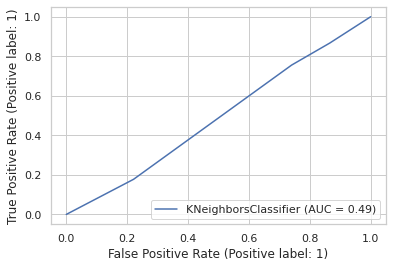

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


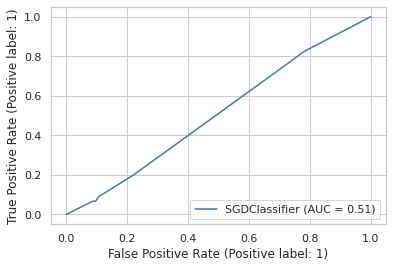

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


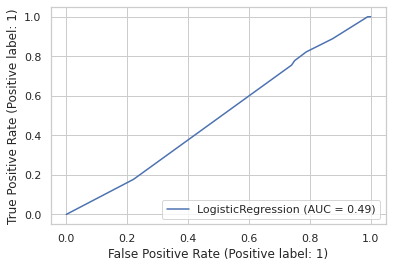

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


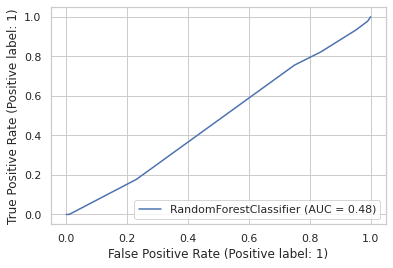

In [164]:
 #ROC Curve and AUROC

plot_roc_curve(knn_model, X_test, y_test)
plt.savefig('ROC_Curve_KNN.png', dpi=1050)
plt.show()
plot_roc_curve(sgd_model, X_test, y_test)
plt.savefig('ROC_Curve_SGD.png', dpi=1050)
plt.show()
plot_roc_curve(log_model, X_test, y_test)
plt.savefig('ROC_Curve_LOG.png', dpi=1050)
plt.show()
plot_roc_curve(rf_model, X_test, y_test)
plt.savefig('ROC_Curve_RF.png', dpi=1050)
plt.show()

